Genetic algorithm for maximising the amount of "1"s in a 20-digit binary string.

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
# paper https://www.whitman.edu/Documents/Academics/Mathematics/2014/carrjk.pdf

In [12]:
from random import randrange, choices

In [13]:
def create_population(psize):
    population = []
    for i in range(psize):
        population.append(''.join(str(randrange(2)) for i in range(20)))
        
    return population

In [14]:
def object_fitness(x):
    return sum(int(i) * 10 for i in list(x))

def calculate_fitness(population):
    f = []
    for i in range(len(population)):
        f.append(object_fitness(population[i]))
        
    return f

In [15]:
# calculating cumulative mating chances, since this is a way to speed up random.choices() function
def calculate_cum_mating_chances(population, fitness):
    mating_chances = []
    sum_fitness = sum(fitness)
    intermediate_sum = 0

    for i in range(len(population)):
        #intermediate_sum += round(100 * fitness[i] / sum_fitness)
        intermediate_sum += fitness[i]
        #print(fitness[i], round(100 * fitness[i] / sum_fitness))
        mating_chances.append(intermediate_sum)
    
    return mating_chances

In [16]:
def mate(population, mating_chances):
    psize = len(population)
    parent_per_mating = 2
    offsprings = []
    for i in range(round(psize/parent_per_mating)):
        parent1 = choices(range(psize), cum_weights=mating_chances, k=1)[0]
        parent2 = choices(range(psize), cum_weights=mating_chances, k=1)[0]    
        while parent1 == parent2:
            parent2 = choices(range(psize), cum_weights=mating_chances, k=1)[0]

        cut = randrange(1, len(population[parent1]) - 1)
        offspring1 = population[parent1][0:cut] + population[parent2][cut:]
        offspring2 = population[parent2][0:cut] + population[parent1][cut:]
        offsprings.append(offspring1)
        offsprings.append(offspring2);
    
    return offsprings

In [17]:
def mutate(population):
    for i in range(len(population)):
        for j in range(len(population[0])):
            if randrange(1000) <= 3:
                #print("mutating bit " + str(j) + " of " + population[i])
                temp = list(population[i])
                temp[j] = "0" if temp[j] == "1" else "1"
                population[i] = ''.join(temp)
                #print(population[i])
    
    return population

In [18]:
def print_generation(gen, population, fitness):
    print("Generation " + str(gen) + " Fitness: " + str(sum(fitness)) + " total, " + str(round(sum(fitness) / (1+len(fitness)))) + " average")
    #print(population)

population = create_population(50)
gen_log = []
number_of_perfects = []

for gen in range(2000):
    fitness = calculate_fitness(population)
    #print_generation(gen, population, fitness)
    gen_log.append(round(sum(fitness) / len(fitness)))
    number_of_perfects.append(sum(1 for i in population if i == '11111111111111111111'))
    mating_chances = calculate_cum_mating_chances(population, fitness)
    #print(fitness)
    #print(mating_chances)
    population = mate(population, mating_chances)
    population = mutate(population)

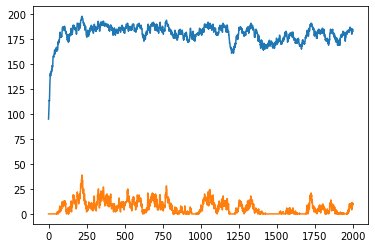

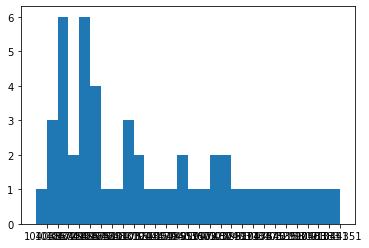

In [19]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.plot(range(len(gen_log)), gen_log)
plt.plot(range(len(number_of_perfects)), number_of_perfects)
plt.show()

numbers = [int(i, 2) for i in population]
labels, values = zip(*Counter(numbers).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()
